In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
housing_df = pd.read_csv('train.csv')
housing_df = housing_df.set_index('Id')
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [4]:
#Por ahora solo usaremos las variables numericas y dejando para otra ocasion tecnicas One HoT Encoding 
#que pudieran servir para el caso de vars categoricas

housing_df = housing_df.select_dtypes(exclude='object')
housing_df.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500


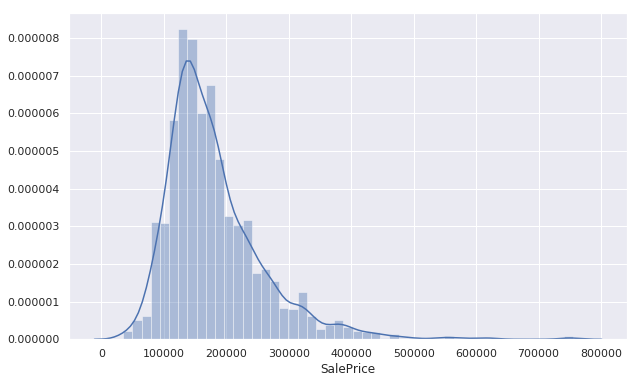

In [5]:
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(housing_df['SalePrice']);

In [6]:
housing_df.isnull().sum() * 100 / len(housing_df)

MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
d

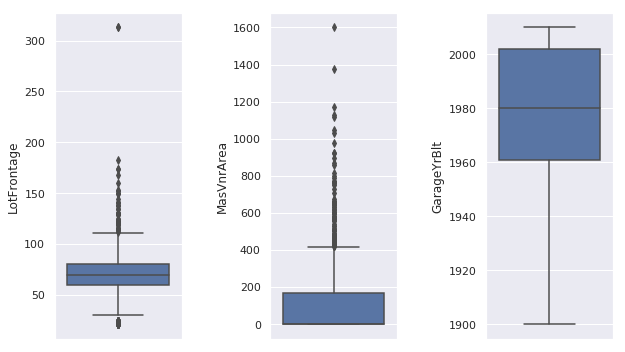

In [7]:
f, axes = plt.subplots(1, 3)

sns.set(rc={'figure.figsize':(9,5)})
plt.subplots_adjust(wspace = 0.7)

sns.boxplot(housing_df['LotFrontage'],  orient='v' , ax=axes[0])
sns.boxplot(housing_df['MasVnrArea'],  orient='v' , ax=axes[1])
sns.boxplot(housing_df['GarageYrBlt'],  orient='v' , ax=axes[2]);

In [8]:
housing_df.shape

(1460, 37)

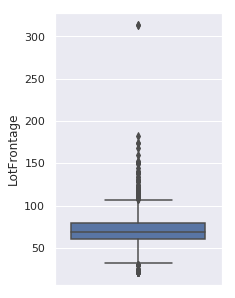

In [9]:
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())
sns.set(rc={'figure.figsize':(3,5)})
sns.boxplot(housing_df['LotFrontage'], orient='v');

In [10]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].median())
housing_df = housing_df.dropna()
housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
housing_df.isnull().sum() * 100 / len(housing_df)

MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64

In [12]:
housing_df.corr()['SalePrice']

MSSubClass      -0.082813
LotFrontage      0.333184
LotArea          0.264674
OverallQual      0.789997
OverallCond     -0.076294
YearBuilt        0.522896
YearRemodAdd     0.507158
MasVnrArea       0.477493
BsmtFinSF1       0.383977
BsmtFinSF2      -0.010316
BsmtUnfSF        0.215740
TotalBsmtSF      0.612971
1stFlrSF         0.606849
2ndFlrSF         0.322710
LowQualFinSF    -0.025263
GrLivArea        0.710080
BsmtFullBath     0.225027
BsmtHalfBath    -0.015993
FullBath         0.562491
HalfBath         0.282040
BedroomAbvGr     0.171934
KitchenAbvGr    -0.137419
TotRmsAbvGrd     0.536311
Fireplaces       0.468930
GarageYrBlt      0.466247
GarageCars       0.639686
GarageArea       0.622492
WoodDeckSF       0.324650
OpenPorchSF      0.311268
EnclosedPorch   -0.128778
3SsnPorch        0.045247
ScreenPorch      0.113044
PoolArea         0.093109
MiscVal         -0.020951
MoSold           0.045136
YrSold          -0.026180
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [13]:
important_vars = housing_df.corr()['SalePrice'].where(lambda x : x >= 0.5).dropna()
important_vars

OverallQual     0.789997
YearBuilt       0.522896
YearRemodAdd    0.507158
TotalBsmtSF     0.612971
1stFlrSF        0.606849
GrLivArea       0.710080
FullBath        0.562491
TotRmsAbvGrd    0.536311
GarageCars      0.639686
GarageArea      0.622492
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [14]:
housing_df = housing_df[important_vars.index]
housing_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,208500
2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
3,7,2001,2002,920,920,1786,2,6,2,608,223500
4,7,1915,1970,756,961,1717,1,7,3,642,140000
5,8,2000,2000,1145,1145,2198,2,9,3,836,250000


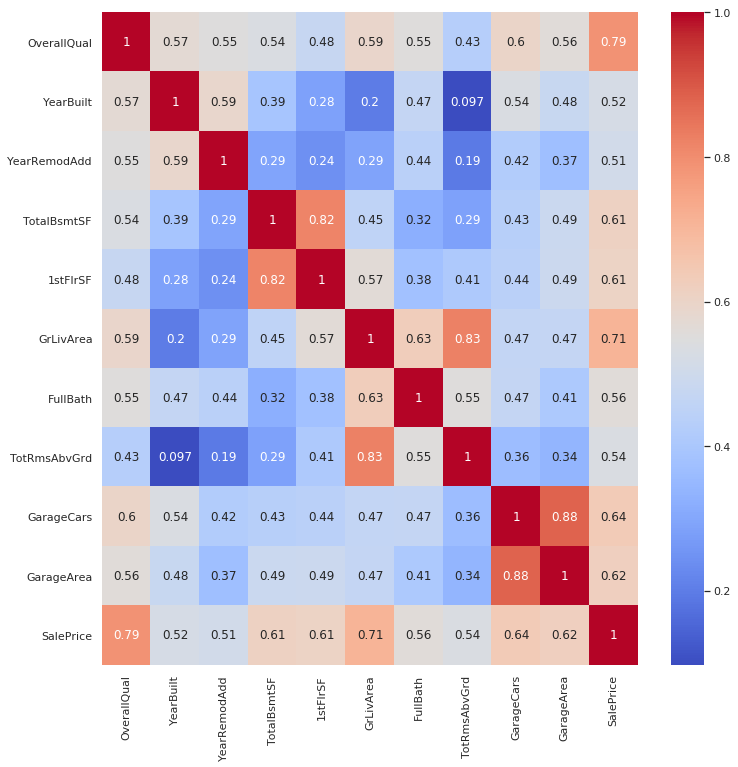

In [15]:
sns.set(rc={'figure.figsize':(12,12)})

sns.heatmap(housing_df.corr(), cmap='coolwarm', cbar=True, annot=True);

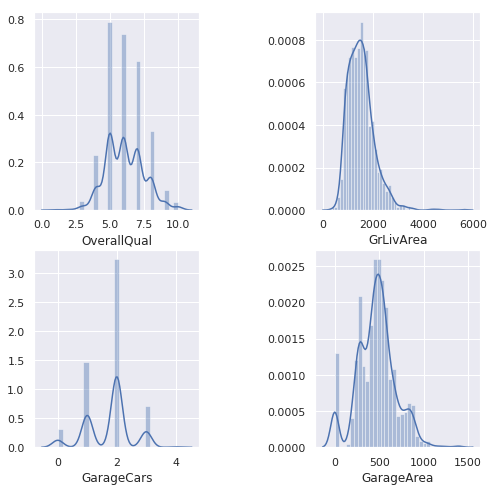

In [16]:
sns.set(rc={'figure.figsize':(8,8)})
plt.subplots_adjust(wspace = 0.7)
plt.subplot(2,2,1)
sns.distplot(housing_df['OverallQual'])
plt.subplot(2,2,2)
sns.distplot(housing_df['GrLivArea'])
plt.subplot(2,2,3)
sns.distplot(housing_df['GarageCars'])
plt.subplot(2,2,4)
sns.distplot(housing_df['GarageArea']);

In [17]:
for i in housing_df.columns: print(i)

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageCars
GarageArea
SalePrice


In [18]:
import statsmodels.api as sm

Y = housing_df['SalePrice']
X = sm.add_constant(housing_df['OverallQual'])

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

/home/jelv/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2407.
Date:                Sat, 11 Jan 2020   Prob (F-statistic):          2.26e-310
Time:                        12:34:27   Log-Likelihood:                -17729.
No. Observations:                1452   AIC:                         3.546e+04
Df Residuals:                    1450   BIC:                         3.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.567e+04   5773.897    -16.570      0.000   -1.07e+05   -8.43e+04
OverallQual  4.535e+04    924.196     49.065      0.000    4.35e+04    4.72e+04
==============================================================================
Omnibus:                      592.272   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5942.832
Skew:                           1.616   Prob(JB):                         0.00
Kurtosis:                      12.369   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

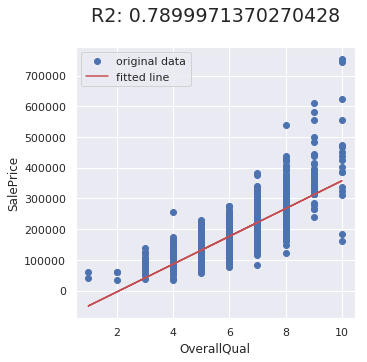

In [19]:
from scipy import stats
sns.set(rc={'figure.figsize':(5,5)})

x = housing_df['OverallQual']
y = housing_df['SalePrice']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(f'R2: {r_value}', fontsize=19, pad=25)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.legend();

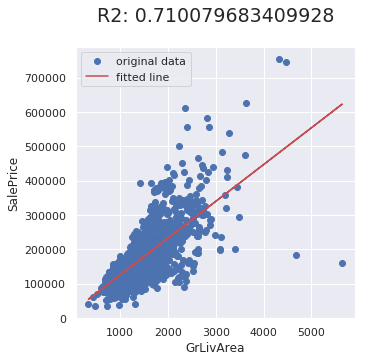

In [20]:
x = housing_df['GrLivArea']
y = housing_df['SalePrice']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(f'R2: {r_value}', fontsize=19, pad=25)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend();

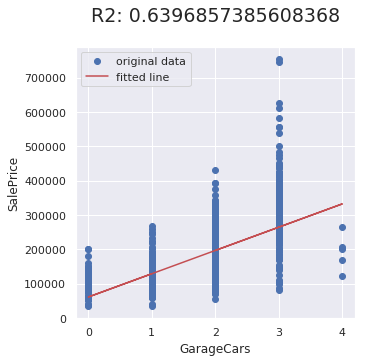

In [21]:
x = housing_df['GarageCars']
y = housing_df['SalePrice']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(f'R2: {r_value}', fontsize=19, pad=25)
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.legend();

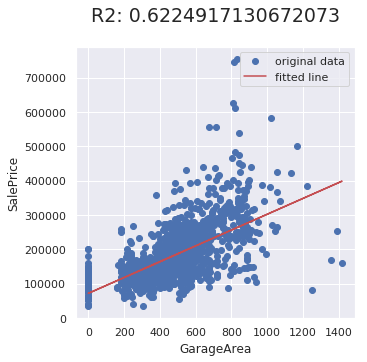

In [22]:
x = housing_df['GarageArea']
y = housing_df['SalePrice']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(f'R2: {r_value}', fontsize=19, pad=25)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.legend();

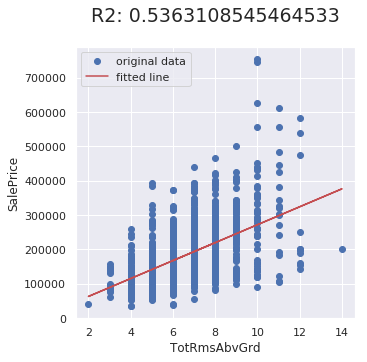

In [23]:
x = housing_df['TotRmsAbvGrd']
y = housing_df['SalePrice']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(f'R2: {r_value}', fontsize=19, pad=25)
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.legend();

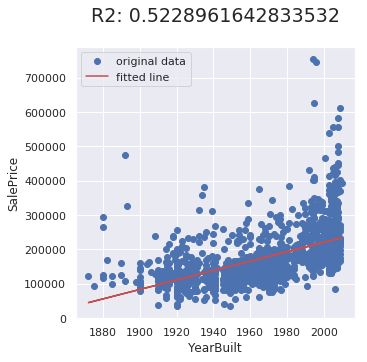

In [24]:
x = housing_df['YearBuilt']
y = housing_df['SalePrice']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(f'R2: {r_value}', fontsize=19, pad=25)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend();

In [25]:
from statsmodels.formula.api import ols

x = housing_df[[i for i in housing_df.columns[:-1]]]
y = housing_df['SalePrice']


model_multi_var = ols('y ~ x', data = housing_df).fit()

model_multi_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     492.4
Date:                Sat, 11 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:34:31   Log-Likelihood:                -17361.
No. Observations:                1452   AIC:                         3.474e+04
Df Residuals:                    1441   BIC:                         3.480e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.192e+06   1.29e+05     -9.226      0.000   -1.45e+06   -9.39e+05
x[0]        1.937e+04   1192.126     16.244      0.000     1.7e+04    2.17e+04
x[1]         270.1358     50.341      5.366      0.000     171.386     368.885
x[2]         297.9883     63.558      4.688      0.000     173.311     422.665
x[3]          19.8833      4.288      4.636      0.000      11.471      28.296
x[4]          14.2584      4.938      2.887      0.004       4.571      23.946
x[5]          51.4510      4.232     12.158      0.000      43.150      59.752
x[6]       -6435.4048   2688.149     -2.394      0.017   -1.17e+04   -1162.301
x[7]          17.0197   1118.656      0.015      0.988   -2177.349    2211.388
x[8]        1.044e+04   3040.863      3.435      0.001    4479.591    1.64e+04
x[9]          14.4014     10.304      1.398      0.162      -5.811      34.614
==============================================================================
Omnibus:                      479.740   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59963.194
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                      34.471   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
housing_df.corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.571111,0.549573,0.537122,0.476936,0.594417,0.552266,0.430549,0.599734,0.560543,0.789997
YearBuilt,0.571111,1.000000,0.590674,0.392562,0.284570,0.199343,0.469625,0.097440,0.537492,0.478439,0.522896
YearRemodAdd,0.549573,0.590674,1.000000,0.291492,0.242488,0.288279,0.440329,0.193988,0.419815,0.370674,0.507158
TotalBsmtSF,0.537122,0.392562,0.291492,1.000000,0.818246,0.453840,0.321206,0.285760,0.433601,0.486242,0.612971
1stFlrSF,0.476936,0.284570,0.242488,0.818246,1.000000,0.565833,0.377828,0.410224,0.439550,0.490877,0.606849
GrLivArea,0.594417,0.199343,0.288279,0.453840,0.565833,1.000000,0.628983,0.825476,0.467149,0.469423,0.710080
FullBath,0.552266,0.469625,0.440329,0.321206,0.377828,0.628983,1.000000,0.554166,0.470008,0.406447,0.562491
TotRmsAbvGrd,0.430549,0.097440,0.193988,0.285760,0.410224,0.825476,0.554166,1.000000,0.363174,0.339296,0.536311
GarageCars,0.599734,0.537492,0.419815,0.433601,0.439550,0.467149,0.470008,0.363174,1.000000,0.882332,0.639686
GarageArea,0.560543,0.478439,0.370674,0.486242,0.490877,0.469423,0.406447,0.339296,0.882332,1.000000,0.622492


In [27]:
housing_df = housing_df[['OverallQual', "GrLivArea", "GarageCars",  "SalePrice"]]
housing_df.head()


,OverallQual,GrLivArea,GarageCars,SalePrice
Id,,,,
1,7,1710,2,208500
2,6,1262,2,181500
3,7,1786,2,223500
4,7,1717,3,140000
5,8,2198,3,250000


In [28]:
x = housing_df[[i for i in housing_df.columns[:-1]]]
y = housing_df['SalePrice']


model_multi_var = ols('y ~ x', data = housing_df).fit()

model_multi_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1364.
Date:                Sat, 11 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:34:32   Log-Likelihood:                -17466.
No. Observations:                1452   AIC:                         3.494e+04
Df Residuals:                    1448   BIC:                         3.496e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.802e+04   4851.279    -20.205      0.000   -1.08e+05   -8.85e+04
x[0]        2.692e+04   1075.764     25.022      0.000    2.48e+04     2.9e+04
x[1]          50.9146      2.558     19.900      0.000      45.896      55.933
x[2]        2.127e+04   1805.566     11.778      0.000    1.77e+04    2.48e+04
==============================================================================
Omnibus:                      418.109   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9727.023
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                      15.583   Cond. No.                     7.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

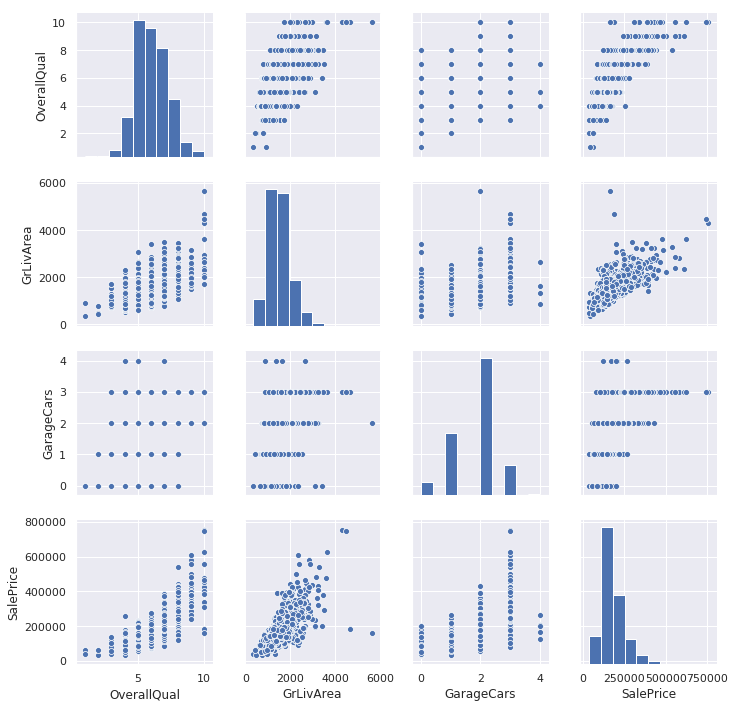

In [32]:
sns.set(rc={'figure.figsize':(7,7)})
sns.pairplot(housing_df);

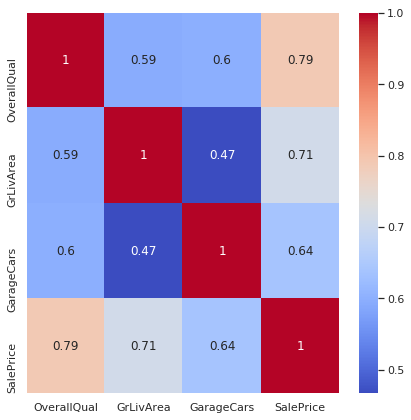

In [31]:
sns.set(rc={'figure.figsize':(7,7)})

sns.heatmap(housing_df.corr(), cmap='coolwarm', cbar=True, annot=True);